In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings 
import joblib

warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data_path = "C:/Users/USER/Desktop/Projects/Crop-Yield-Prediction/Data/data2/crop_production.csv"
crop_data = pd.read_csv(data_path)

In [3]:
# Handling missing values
crop_data.dropna(inplace=True)

In [4]:
# Dropping unnecessary columns
crop_data.drop(['State_Name'], axis=1, inplace=True)

In [5]:
# Splitting the dataset into training and validation sets
X = crop_data.drop(['Production'], axis=1)
y = crop_data.Production
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1234)

In [6]:
X_train.dtypes

District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
dtype: object

In [7]:
pool_train = Pool(X_train, y_train,
                  cat_features = ['District_Name',  'Season', 'Crop'])

pool_test = Pool(X_val, cat_features = ['District_Name', 'Season', 'Crop'])

In [8]:
# Training the CatBoost model
model = CatBoostRegressor(
    iterations=100,
    max_depth=5,
    learning_rate=0.1,
    random_seed=1234,
    loss_function='RMSE'
)

In [9]:
model.fit(pool_train, eval_set=(X_val,  y_val ))

0:	learn: 16458970.3669308	test: 15011329.9002539	best: 15011329.9002539 (0)	total: 206ms	remaining: 20.4s
1:	learn: 15531565.6076159	test: 14117960.6997007	best: 14117960.6997007 (1)	total: 259ms	remaining: 12.7s
2:	learn: 14733670.4323850	test: 13362267.1456676	best: 13362267.1456676 (2)	total: 303ms	remaining: 9.81s
3:	learn: 14050709.9657489	test: 12728684.1247227	best: 12728684.1247227 (3)	total: 349ms	remaining: 8.37s
4:	learn: 13484119.0254794	test: 12203408.8438489	best: 12203408.8438489 (4)	total: 394ms	remaining: 7.48s
5:	learn: 12979834.7596232	test: 11757105.8852242	best: 11757105.8852242 (5)	total: 445ms	remaining: 6.97s
6:	learn: 12528489.7829411	test: 11328304.8498635	best: 11328304.8498635 (6)	total: 495ms	remaining: 6.58s
7:	learn: 12106847.6757370	test: 10963558.0066314	best: 10963558.0066314 (7)	total: 541ms	remaining: 6.22s
8:	learn: 11767441.9897947	test: 10694748.3645200	best: 10694748.3645200 (8)	total: 591ms	remaining: 5.98s
9:	learn: 11454405.6719360	test: 1043

79:	learn: 5870617.9905007	test: 6607618.1224151	best: 6605559.3223465 (78)	total: 4.08s	remaining: 1.02s
80:	learn: 5867783.0425572	test: 6604072.0793349	best: 6604072.0793349 (80)	total: 4.16s	remaining: 976ms
81:	learn: 5867619.3722597	test: 6603929.5792525	best: 6603929.5792525 (81)	total: 4.23s	remaining: 928ms
82:	learn: 5865576.6227239	test: 6600631.3391083	best: 6600631.3391083 (82)	total: 4.3s	remaining: 880ms
83:	learn: 5859859.9940845	test: 6611007.6383610	best: 6600631.3391083 (82)	total: 4.37s	remaining: 832ms
84:	learn: 5842339.9322093	test: 6606522.1052712	best: 6600631.3391083 (82)	total: 4.44s	remaining: 783ms
85:	learn: 5841745.8757150	test: 6607329.9993834	best: 6600631.3391083 (82)	total: 4.51s	remaining: 734ms
86:	learn: 5828934.1740857	test: 6609815.7718930	best: 6600631.3391083 (82)	total: 4.58s	remaining: 684ms
87:	learn: 5828862.6228151	test: 6609817.4222120	best: 6600631.3391083 (82)	total: 4.64s	remaining: 634ms
88:	learn: 5819393.7761981	test: 6605356.539026

In [10]:
y_pred = model.predict(pool_test)

In [11]:
# Evaluating the model
#y_pred = model.predict(X_val)
r_squared = r2_score(y_val, y_pred)
print("R_Square score : ", r_squared)

R_Square score :  0.8345487142947858


In [12]:
# Calculating and printing Adjusted R-Squared score
n = len(y_val)
p = X_val.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adj. R_Squared : {}".format(adj_r_squared))

Adj. R_Squared : 0.8345373357212947


Text(0.5, 1.0, 'CatBoost Regression')

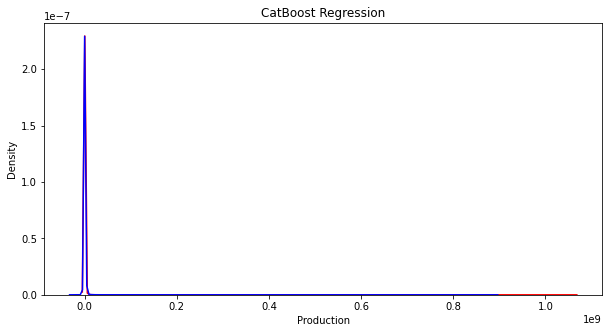

In [13]:
# Visualizing model performance
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(y_val, hist=False, color="r", label="Actual value ", ax=ax)
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('CatBoost Regression')

Text(0.5, 1.0, 'Feature Importance')

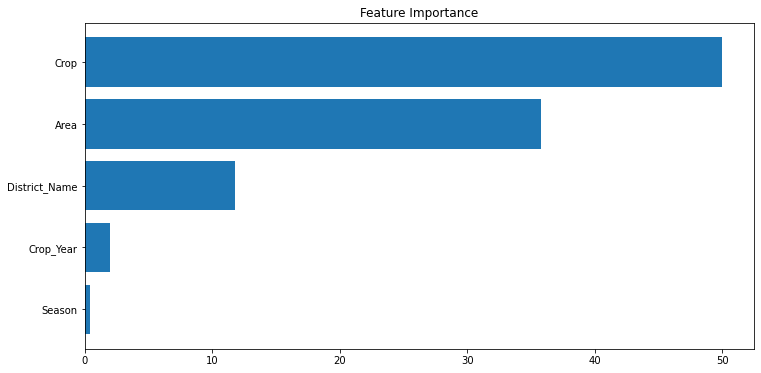

In [14]:
# Visualizing feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig, ax = plt.subplots(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

In [15]:
# Saving the model to file
joblib.dump(model, 'catboost_model.pkl')

['catboost_model.pkl']

In [17]:
import requests

input_data = [{"District_Name": 'YADGIR', 
               "Crop_Year": 2011,        
               "Season": 'Rabi',        
               "Crop": 'Groundnut',       
               "Area": 23194.0 }]

response = requests.post("http://localhost:8000/predict", json=input_data)

if response.status_code in range(200, 300):
    data = response.json()
    print(data)
else:
    print("Error: status code", response.status_code)


[{'Prediction': 669637.1241911268}]
